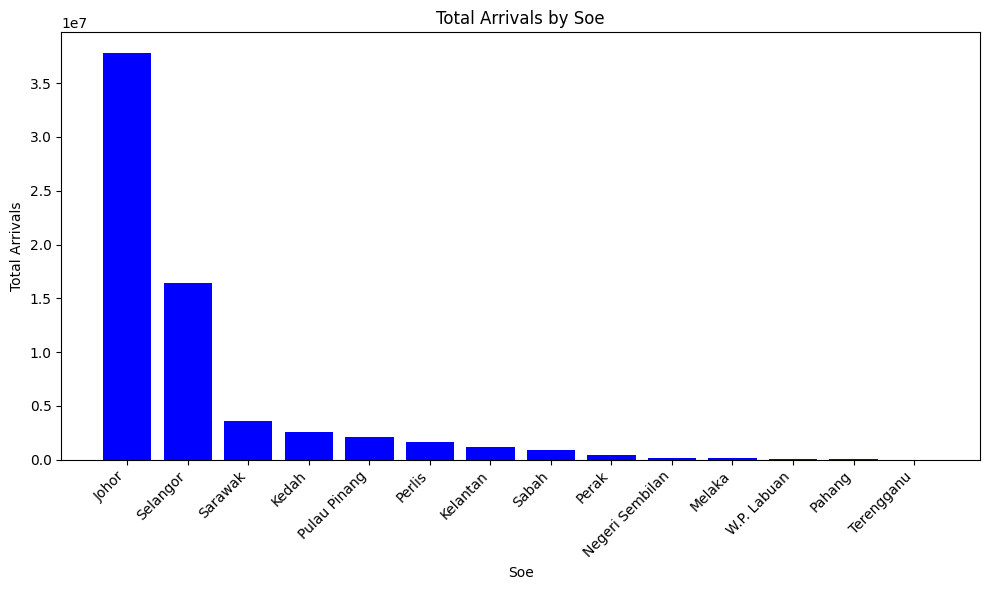

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)

        return data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")

def clean_data(df):
    try:
        df = df[df['arrivals'] != 0]
        df = df.dropna()
        df = df.drop_duplicates()
        df = df.reset_index(drop=True)

        return df

    except Exception as e:
        print(f"An error occurred during data cleaning: {e}")
        return None

def total_arrivals_by_country(df):
    try:
        grouped_df = df.groupby('soe')['arrivals'].sum().reset_index()

        grouped_df = grouped_df.sort_values(by='arrivals', ascending=False)

        return grouped_df

    except KeyError:
        print(f"Error: Column not found in DataFrame.")
        return None
    except Exception as e:
        print(f"An error occurred during analysis: {e}")
        return None

def plot_trends(df):
    try:
        plt.figure(figsize=(10, 6))
        plt.bar(df['soe'], df['arrivals'], color='blue')
        plt.title('Total Arrivals by Soe')
        plt.xlabel('Soe')
        plt.ylabel('Total Arrivals')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    except KeyError:
        print(f"Error: 'country' or 'arrivals' column not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")

def main():
    file_path = 'arrivals_soe.csv'
    df = load_data(file_path)

    if df is not None:
        df = clean_data(df)

        if df is not None:
            analyzed_df = total_arrivals_by_country(df)
            analyzed_df.to_csv('total_arrivals.csv', index=False)

            plot_trends(analyzed_df)

if __name__ == "__main__":
    main()